# CONTENT

Object oriented implementaiton of some of the most promising algorithms tested. Assessment of performance of different algorithms and different averaging strategies made here with buchwald-hartwig reactions.

In [ ]:
#For numerical operation and optimization
import numpy as np
import pandas as pd
import itertools
from scipy.optimize import lsq_linear
from tqdm import tqdm

#For plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#For constrained minimization
# import spgl1
import cvxpy as cp

----
## Import and visualization of the design matrix and catalysts name/distances

In [ ]:
M = np.array([[1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0],
              [0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0],
              [0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0],
              [0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0],
              [0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0],
              [1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1],
              [0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0],
              [0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0],
              [0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1],
              [1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0],
              [0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0],
              [0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0],
              [0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0],
              [0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0]])

In [ ]:
#eliminate column 2 (catalyst IPent Cl)
M_no_two = np.delete(M, 2, axis = 1)
#eliminate rows in which 2 appears (experiment where Ipent Cl was introduced)
M_no_two = np.delete(M_no_two, [2,7,12] , axis = 0)

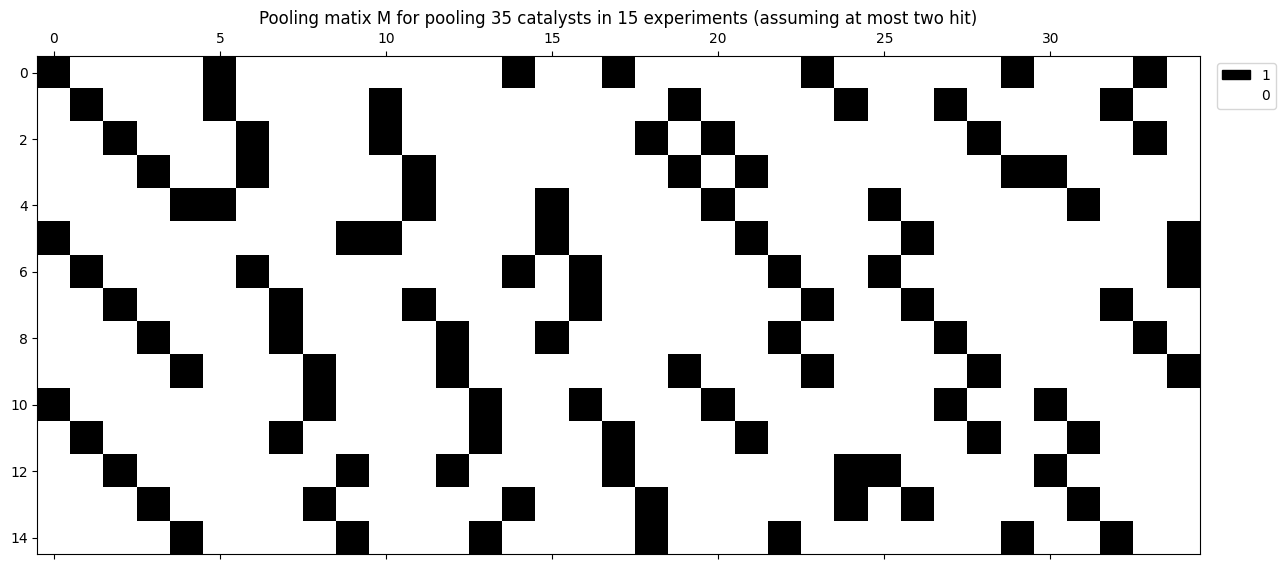

In [ ]:
# Plot the data with a specified size
fig, ax = plt.subplots(figsize=(15, 8))
cax = ax.matshow(M, cmap='gray_r')

# Create a custom legend
import matplotlib.patches as mpatches
black_patch = mpatches.Patch(color='black', label='1')
white_patch = mpatches.Patch(color='white', label='0')

# Place the legend outside the plot
ax.legend(handles=[black_patch, white_patch], loc='upper center', bbox_to_anchor=(1.04, 1))
plt.title(f"Pooling matix M for pooling {M.shape[1]} catalysts in {M.shape[0]} experiments (assuming at most two hits)")
plt.show()

In [ ]:
names = ['meCgPPh', 'TrixiePhos','IPENT Cl','RuPhos', 'RockPhos','VPhos', 'PPh_3',  'tBuBrettPhos', 'SIPr','CPhos',  'DPEPhos',  'AlPhos','Triisobutyl-Phosphatrane','SPhos', 'XantPhos','Me3(OMe)-tBuXPhos','Amphos','Jackie CPhos' ,  'dppp', 'Mordal-Phos', 'Jackie Phos', 'dppf','P(tBu)_3','GPhos',    'BINAP','BippyPhos','cataCXlum A', 'dppdtbpf','QPhos', 'cBridP', 'dtbpf','JosiPhosSL J009-1','PCy_3', 'XPhos','tBuXPhos' ]

In [ ]:
for i, element in enumerate(names):
  print("number", i, "is assigned to", element)

number 0 is assigned to meCgPPh
number 1 is assigned to TrixiePhos
number 2 is assigned to IPENT Cl
number 3 is assigned to RuPhos
number 4 is assigned to RockPhos
number 5 is assigned to VPhos
number 6 is assigned to PPh_3
number 7 is assigned to tBuBrettPhos
number 8 is assigned to SIPr
number 9 is assigned to CPhos
number 10 is assigned to DPEPhos
number 11 is assigned to AlPhos
number 12 is assigned to Triisobutyl-Phosphatrane
number 13 is assigned to SPhos
number 14 is assigned to XantPhos
number 15 is assigned to Me3(OMe)-tBuXPhos
number 16 is assigned to Amphos
number 17 is assigned to Jackie CPhos
number 18 is assigned to dppp
number 19 is assigned to Mordal-Phos
number 20 is assigned to Jackie Phos
number 21 is assigned to dppf
number 22 is assigned to P(tBu)_3
number 23 is assigned to GPhos
number 24 is assigned to BINAP
number 25 is assigned to BippyPhos
number 26 is assigned to cataCXlum A
number 27 is assigned to dppdtbpf
number 28 is assigned to QPhos
number 29 is assigne

In [ ]:
for i in range(15):
  print("experiment", i + 1, "should have cats", [names[j] for j in range(M.shape[1]) if M[i,j] != 0])
print("experiment 16 should have what we think might be the most reactive catalyst")

experiment 1 should have cats ['meCgPPh', 'VPhos', 'XantPhos', 'Jackie CPhos', 'GPhos', 'cBridP', 'XPhos']
experiment 2 should have cats ['TrixiePhos', 'VPhos', 'DPEPhos', 'Mordal-Phos', 'BINAP', 'dppdtbpf', 'PCy_3']
experiment 3 should have cats ['IPENT Cl', 'PPh_3', 'DPEPhos', 'dppp', 'Jackie Phos', 'QPhos', 'XPhos']
experiment 4 should have cats ['RuPhos', 'PPh_3', 'AlPhos', 'Mordal-Phos', 'dppf', 'cBridP', 'dtbpf']
experiment 5 should have cats ['RockPhos', 'VPhos', 'AlPhos', 'Me3(OMe)-tBuXPhos', 'Jackie Phos', 'BippyPhos', 'JosiPhosSL J009-1']
experiment 6 should have cats ['meCgPPh', 'CPhos', 'DPEPhos', 'Me3(OMe)-tBuXPhos', 'dppf', 'cataCXlum A', 'tBuXPhos']
experiment 7 should have cats ['TrixiePhos', 'PPh_3', 'XantPhos', 'Amphos', 'P(tBu)_3', 'BippyPhos', 'tBuXPhos']
experiment 8 should have cats ['IPENT Cl', 'tBuBrettPhos', 'AlPhos', 'Amphos', 'GPhos', 'cataCXlum A', 'PCy_3']
experiment 9 should have cats ['RuPhos', 'tBuBrettPhos', 'Triisobutyl-Phosphatrane', 'Me3(OMe)-tBuXPho

TrixiePhos Pd G, MorDalPhos Pd G, DPEPhosPd(allyl, rac-BINAP Pd G3, (dppdtbpf)PdCl2, P(Cy)3 Pd(croty

In [ ]:
Pd-PEPPSI-IPent, AmPhos Pd(croty, AlPhosPd G6 Br, GPhos Pd G6 Br, Pd(CataCXiumA)(, P(Cy)3 Pd(croty

In [ ]:
#read the numpy object from the path
D_numpy = np.load('/content/drive/MyDrive/Data/matrix_D_for_lasso_object.npy')
D_numpy

array([[-115,  115,    0, ...,    0,    0,    0],
       [-392,    0,  392, ...,    0,    0,    0],
       [ -54,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., -218,  218,    0],
       [   0,    0,    0, ..., -218,    0,  218],
       [   0,    0,    0, ...,    0,  -58,   58]])

------
## Creation of the data and experimental setup

In [ ]:
###### SIMULATION WITH SYNTHETIC DATA ########

#Insert here the hitters (their indexes as a int) and the perc yeald that they
#will prodcue (their numerical value as float in [0,100]) in the following dict
true_hitters = {0:70, 1:2, 2:30, 3:50, 4:45, 5:3, 6:95, 7:30, 27:50, 9:90, 18:40, 19:37, 30:60, 32:74, 33:84}

def generate_y_and_true_x(true_hitters, M):
  """
  Generates simulated experimental results (y) and the corresponding true
  catalyst activity vector (true_x) based on a provided dictionary of
  true hitters and their yields.

  Args:
    true_hitters: A dictionary where keys are catalyst indices (integers) and
                   values are their corresponding yields (floats between 0 and 100).
    M: The pooling matrix (numpy array).

  Returns:
    A tuple containing:
      - y: A numpy array representing the simulated experimental results.
      - true_x: A numpy array representing the true catalyst activity vector,
                where each element corresponds to the yield of a catalyst.
  """
  true_x = np.zeros(M.shape[1])
  for key, value in true_hitters.items():
    true_x[key] = value

  y = M @ true_x
  return y, true_x

true_hitters_copy = true_hitters.copy()
#sort the dictionary according to the value
true_hitters_copy = dict(sorted(true_hitters_copy.items(), key=lambda item: item[1], reverse=True))

y, true_x = generate_y_and_true_x(true_hitters, M)
y_pre  = y

np.set_printoptions(suppress=True)
print("Sorted selected catalysts and their yields:\n", true_hitters_copy, "\n")
print("True x vector to recover is: \n", true_x, "\n")
print("Giving rise to a y vector that is:\n ", y, "\n")
np.set_printoptions(suppress=False)



Sorted selected catalysts and their yields:
 {6: 95, 9: 90, 33: 84, 32: 74, 0: 70, 30: 60, 3: 50, 27: 50, 4: 45, 18: 40, 19: 37, 2: 30, 7: 30, 5: 3, 1: 2} 

True x vector to recover is: 
 [70.  2. 30. 50. 45.  3. 95. 30.  0. 90.  0.  0.  0.  0.  0.  0.  0.  0.
 40. 37.  0.  0.  0.  0.  0.  0.  0. 50.  0.  0. 60.  0. 74. 84.  0.] 

Giving rise to a y vector that is:
  [157. 166. 249. 242.  48. 160.  97. 134. 214.  82. 180.  32. 180.  90.
 249.] 



In [ ]:
def COMP(M, y, verbose):
  """
  COMP decoding algoruthm to eliminate the true negative (non hitters) and the
  surely positive elements (real hitters). If a catalyst appears in all the
  experiments/pools that returned a signigicantly high value of hit percentage,
  then it will be classified as potentially positive and whatever is not
  potentially positive is surely negative


  Args:
    M: The pooling matrix (numpy array).
    y: The experimental results vector (numpy array).

  Returns:
    A tuple containing:
      - A set of indices corresponding to catalysts identified as true negatives
        (non-hitters).
      - A set of indices corresponding to catalysts identified as potential
        hitters.

  """
  prob_hitters = {}
  true_positives = {}

  #Look at the experiment where nothing happened
  no_hit_exper = [i for i in range(len(y)) if y[i] == 0]

  #In those experiment all the catalysts that were in that pool are true negatives
  true_negatives = set([j for i in no_hit_exper for j in range(M.shape[1]) if M[i,j] != 0 ])

  #Everything else is a possible hit
  possible_hits = set([i for i in range(M.shape[1])]).difference(true_negatives)

  return true_negatives, possible_hits

In [ ]:
def binarize(vector):
  """
  Helper function that given a vector returns a binary vector of the same lenght
  that has 1 if the input vector has a value different than 0 and 0 otherwise

  Args:
    vector: A numerical numpy array.

  Returns:
    A binary numpy array of the same length, where each element is 1 if the
    corresponding element in the input vector is non-zero, and 0 otherwise.

  """
  return np.array([1 if vector[i] != 0 else 0 for i in range(len(vector))])

In [ ]:
def score_and_find_hitter_subsets(testing_vectors, M, y):
  """
  Scores candidate hitter subsets and identifies those with the minimum score.

  Args:
    testing_vectors: A dictionary of candidate hitter subsets, where keys are
                      tuples of indices and values are binary numpy arrays
                      representing the presence/absence of each catalyst.
    M: The pooling matrix (numpy array).
    y: The experimental results vector (numpy array).

  Returns:
    A list of tuples representing the candidate hitter subsets with the
    minimum score.
  """
  scores = {}
  for key, vector in testing_vectors.items():
    scores[key] = np.sum(np.abs(binarize(M @ vector) - binarize(y)))

  sorted_scores = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1])}

  ## OLDER OLDER VERSION
  # min_len = len(list(sorted_scores.items())[0][0])

  ## OLDER VERSION
  # min_score = list(sorted_scores.values())[0]

  ## OLDER OLDER VERSION
  # return [key for key, value in sorted_scores.items() if (len(key) == min_len and value == min_score)]

  ## OLDER VERSION
  ## MAYBE BETTER TO CREATE GROUPS DEPENDING ON THE SIZE OF THE MINIMIZER SO LATER WE RETURN THE FIRST RESULT (IN TERMS OF SET CARDINALITY) FOR WHICH I OBTAIN ZERO. AS DONE HERE BELOW
  # tuplalist = [key for key, value in sorted_scores.items() if  value == min_score]
  # min_len, max_len = len(tuplalist[0]), len(tuplalist[-1])
  # empty_lista = [[] for i in range(min_len, max_len+1)]
  # for element in tuplalist:
  #   index = len(element) - min_len
  #   empty_lista[index].append(element)
  # return empty_lista

  return [key for key, value in sorted_scores.items() if value == 0]

In [ ]:
def get_y_prime_and_M_prime(M, y, possible_hits):

  hitter_exper = [i for i in range(len(y)) if y[i] != 0]

  y_prime = y[hitter_exper]
  M_prime = M[hitter_exper,:][:,list(possible_hits)]

  return y_prime, M_prime

In [ ]:
def Compressed_Sensing_SPGL(M, y, possible_hits, tau = 5):

  y_prime, M_prime = get_y_prime_and_M_prime(M, y, possible_hits)
  #Notice that the elements in x correspond to yield of possible catalysts
  #and the order of appearence in x is the one of the sorted integers, even
  #if the ordre in the set was random
  print("M prime", M_prime)
  x, r, g, info = spgl1.spgl1(M_prime, y_prime, tau = 200, sigma=1, verbosity=0, )

                                                                              #one can also play with this tolelrance
  new_possible_hits = set([sorted(list(possible_hits))[i] for i in range(len(x)) if x[i] >= 0.1])
  print("Optimal solution", x)
  print("Optimal residual L2 Norm", info['rnorm'])
  print("Status: ", info["stat"], " (this should be 4 according to documentation)")
  return new_possible_hits


In [ ]:
def Compressed_Sensing_CVXPY(M, y, n_hit, true_negatives = set([]), epsilon = 0.1, verbose=False):

  ### L1 NORM ###
  n = M.shape[1]
  # The threshold value below which we consider an element to be zero.
  delta = 1e-8

  true_neg_indices = list(true_negatives)
  true_neg_indices.sort()

  x_l1 = cp.Variable(shape=n)

  # Setup the problem.
  obj = cp.Minimize( cp.norm(x_l1, 1) )
  if len(true_negatives) > 0:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon, x_l1[true_neg_indices] == 0]
  else:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon]
  prob = cp.Problem(obj, constraints)
  prob.solve()
  if verbose:
    print("Status: ", prob.status)
    print("Optimal value of optimization problem", obj.value)

  new_possible_hits = [i for i in range(len(x_l1.value)) if x_l1.value[i] >= 0.1]
  if verbose:
    print("Optimal solution", new_possible_hits)
  yield_of_hitters = x_l1.value[new_possible_hits]
  if verbose:
    print("Optimal yield", yield_of_hitters)

  if len(new_possible_hits) <= n_hit:
    return new_possible_hits

  #return the top n new possible hitters in terms of yield
  combined = list(zip(new_possible_hits, yield_of_hitters))
  sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)
  top_n_hitters = [x[0] for x in sorted_combined[:n_hit]]

  if verbose:
    print("Top", n_hit, "hitters", top_n_hitters)
    print("With yield", [x[1] for x in sorted_combined[:n_hit]] )


  return top_n_hitters


In [ ]:
def Compressed_Sensing_CVXPY_prior(M, y, n_hit, D, true_negatives = set([]), epsilon = 0.1, verbose=False):

  ### L1 NORM ###
  n = M.shape[1]
  # The threshold value below which we consider an element to be zero.
  delta = 1e-8
  lambdaa = 0.001

  true_neg_indices = list(true_negatives)
  true_neg_indices.sort()

  x_l1 = cp.Variable(shape=n)
  D_cvxpy = cp.Parameter(shape=D_numpy.shape, value=D_numpy)


  # Setup the problem.
  obj = cp.Minimize( cp.norm(x_l1, 1) + lambdaa * cp.norm(D_cvxpy @ x_l1) )

  if len(true_negatives) > 0:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon, x_l1[true_neg_indices] == 0]
  else:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon]
  prob = cp.Problem(obj, constraints)
  prob.solve()
  if verbose:
    print("Status: ", prob.status)
    print("Optimal value of optimization problem", obj.value)

  new_possible_hits = [i for i in range(len(x_l1.value)) if x_l1.value[i] >= 0.1]
  if verbose:
    print("Optimal solution", new_possible_hits)
  yield_of_hitters = x_l1.value[new_possible_hits]
  if verbose:
    print("Optimal yield", yield_of_hitters)

  if len(new_possible_hits) <= n_hit:
    return new_possible_hits

  #return the top n new possible hitters in terms of yield
  combined = list(zip(new_possible_hits, yield_of_hitters))
  sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)
  top_n_hitters = [x[0] for x in sorted_combined[:n_hit]]

  if verbose:
    print("Top", n_hit, "hitters", top_n_hitters)
    print("With yield", [x[1] for x in sorted_combined[:n_hit]] )


  return top_n_hitters

In [ ]:
def iterative_log_optimization(M, y, true_negatives, verbose, epsilon = 2.5, NUM_RUNS = 10):

  ### ITERATIVE LOG HEURISTIC ###
  n = M.shape[1]
  # The threshold value below which we consider an element to be zero.
  delta = 1e-8
  # Do NUM_RUNS iterations, allocate variable to hold number of non-zeros (cardinality of x) for each run.
  NUM_RUNS = 10
  nnzs_log = np.array(())



  # Store W as a positive parameter for simple modification of the problem.
  W = cp.Parameter(shape=n, nonneg=True);
  x_log = cp.Variable(shape=n)

  # Initial weights.
  W.value = np.ones(n);

  # Setup the problem.
  obj = cp.Minimize( W.T @ cp.abs(x_log) ) # sum of elementwise product
  # constraints = [cp.norm2(y - M @ x_log) <= epsilon, x_log[list(true_negatives)] == 0]
  constraints = [cp.norm2(y - M @ x_log) <= epsilon]
  prob = cp.Problem(obj, constraints)

  # Do the iterations of the problem, solving and updating W.
  for k in range(1, NUM_RUNS+1):
    # Solve problem.
    # The ECOS solver has known numerical issues with this problem
    # so force a different solver.
    try:
      prob.solve(solver=cp.CVXOPT, verbose=verbose)
    except:
      prob.solve(solver=cp.SCS, verbose=verbose)

    # Check for error.
    if prob.status != cp.OPTIMAL:
        raise Exception("Solver did not converge!")

    # Display new number of nonzeros in the solution vector.
    nnz = (np.absolute(x_log.value) > delta).sum()
    nnzs_log = np.append(nnzs_log, nnz);
    if verbose:
      print('Iteration {}: Found a feasible x in R^{}'
          ' with {} nonzeros...'.format(k, n, nnz))

    # Adjust the weights elementwise and re-iterate
    W.value = np.ones(n)/(delta*np.ones(n) + np.absolute(x_log.value))

  if verbose:
    #Plotting this optimization process
    plt.plot(range(1,1+NUM_RUNS), nnzs_log, label='log heuristic')
    plt.xlabel('iteration', fontsize=16)
    plt.ylabel('number of non-zeros (cardinality)', fontsize=16)
    plt.ylim(0,n)
    plt.xlim(1,NUM_RUNS)
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

  new_possible_hits = [i for i in range(len(x_log.value)) if x_log.value[i] >= 0.1]
  yield_of_hitters = x_log.value[new_possible_hits]

  if verbose:
    print("Optimal solution", new_possible_hits)
    print("Optimal yield", yield_of_hitters)
    print("Optimal value of optimization problem", prob.value)
    print("Status: ", prob.status)

  ## NB: Here the return tipe for the hitters is a list and not a set
  return new_possible_hits, yield_of_hitters


In [ ]:
def Algorithm(M, y, CS_step = 'CVXPY', verbose = False):
  """
  Identifies potential catalyst hitters from experimental data using
  a combination of Continuous Noisy COMP and a hard search algorithm.

  Args:
      M: A numpy array representing the pooling matrix.
      y: A numpy array representing the experimental results (yield).
      tol_exp: Total tolerance for side product yield in the experiment.

  Returns:
      A tuple containing:
          - A list of indices of catalysts minimizing the cost function.
          - A numpy array of optimal yields corresponding to these catalysts.
  """
  ############ CONTINUOUS NOISY COMP ############

  #Use the Continuous Noisy COMP to find sure negative catalysts and possible hitters
  true_negatives, possible_hits = COMP(M, y, verbose)

  if verbose:
    print("CONTINUOUS NOISY COMP RESULT")
    print("True negatives: ", true_negatives)
    print("Possible hitters: ", possible_hits, "\n")

  #If there are no hits reported it means that eighter no reaction occurred or the tollerance selected is too high
  if len(possible_hits) == 0:
    if verbose:
      print("No hits found!")
    return [], []

  #If you have just one possible hitter then it is for sure your true positive and you can perform a (constrained) regression in order to find its yeald
  if len(possible_hits) == 1 or len(possible_hits) == 2:
    if verbose:
      print("Lucky you! COMP was sufficient to find your hitter.")
    bounds = (0, 100)
    hitter = list(possible_hits)[0]
    result = lsq_linear(M[:,hitter].reshape(-1,1), y, bounds=bounds)
    if verbose:
      print("True hitter was catalyst n.", hitter)
      print("With a yeald of: ", np.round(result.x[0], 2))
    return hitter, result.x[0]

  #If there are too many possible hits, then constructing the power set would take too much time and we thetrefore need eighter to: do a Compressed Sensing (CS) step before or cast the initial problem as an optimization problem and solve it (what is called brute force)
  n = 15
  if len(possible_hits) > n:
    if verbose:
      print("Too many possible hitters found! Consider increasing the tol_exp parameter or maybe your reaction is too easy")
    #NOT TESTED IN THIS CONTEXT!
    if CS_step == 'SPGL':
      if verbose:
        print("Performing Compressed Sensing starting from these possible hitters:", possible_hits)
      #One can also play around with the parameter tau. Here default is set after trial and error
      new_possible_hits = Compressed_Sensing_SPGL(M, y, possible_hits, tau = 200)
      if verbose:
        print("New possible hitters:", new_possible_hits)
      possible_hits = new_possible_hits
    elif CS_step == 'CVXPY':
      if verbose:
        print("Performing Compressed Sensing starting from these possible hitters:", possible_hits)
      new_possible_hits = Compressed_Sensing_CVXPY(M, y, n, true_negatives, verbose )
      if verbose:
        print("New possible hitters:", new_possible_hits)
      possible_hits = new_possible_hits
    elif CS_step == 'CVXPY_prior':
      if verbose:
        print("Performing Compressed Sensing starting from these possible hitters:", possible_hits)
      new_possible_hits = Compressed_Sensing_CVXPY_prior(M, y, n, D, true_negatives, verbose )
      if verbose:
        print("New possible hitters:", new_possible_hits)
      possible_hits = new_possible_hits
    elif CS_step == 'iterative_log':
      if verbose:
        print("Performing iterative log optimization")
      #fix in order to make it output top n results
      hitters, yield_of_hitters = iterative_log_optimization(M, y, true_negatives, verbose, epsilon = 0.01, NUM_RUNS = 10)
      possible_hits = hitters
      if verbose:
        print("New possible hitters:", possible_hits)
    elif CS_step == None:
      print("Going for the brute force")
    else:
      raise ValueError("CS_step must be 'SPGL' or 'CVXPY' or 'CVXPY_prior' or 'iterative_log' or None")
  else:
    possible_hits = list(possible_hits).sorted()
    if verbose:
      print("Possible hitters: ", possible_hits)


  ############ HARD SEARCH ############

  #Else you need to continue with the analysis
  result_dict = {}
  best_candidates = [[],[]]
  best_relative_ratio = 0

  for lenght in tqdm(range (1, len(possible_hits)-1)):

    cardinality_set = list(itertools.combinations(list(possible_hits), lenght))

    # #Create set of vectors where each vector has a one in the indices given by the elements of the power set described above
    # testing_vectors = {}
    # for subset in cardinality_set:
    #   vec = np.zeros(M.shape[1])
    #   for i in subset:
    #     vec[i] = 1
    #   testing_vectors[tuple(subset)] = vec

    # candidate_groups = score_and_find_hitter_subsets(testing_vectors, M, y)

    # if verbose:
    #   print("HARD SEARCH RESULT", lenght)
    #   print("Candidate groups of dimension", lenght ,": ", candidate_groups, "\n")


    ############ CONSTRAINED REGRESSION ############
    # this is porbably now even sure to give correct solution


    ## OLDER VERSION
    # mincost = np.inf
    # for cardinality_group in candidate_groups:
    #   for element in cardinality_group:
    #     bounds = (0, np.inf)
    #     #Solving constrained lest squares
    #     result = lsq_linear(M[:,list(element)], y, bounds=bounds)
    #     #Return the tuple that made the error zero with smallest cardinality
    #     if result.cost.item() < mincost:
    #       mincost = result.cost.item()
    #     if result.cost.item() < 1:
    #       print(f"Catalysts that minizmize: {element}")
    #       print(f"Optimal yealds: {[np.round(i, 2) for i in result.x]}")
    #       print(f"Optimal cost: {result.cost.item()}")
    #       return list(element), result.x

    for candidate in cardinality_set:
      bounds = (0, 100)
      #Solving constrained lest squares
      result = lsq_linear(M[:,list(candidate)], y, bounds=bounds)
      #Return the candidates who made the cost go below 15 if any
      #REMARK: 15 is an arbitrary cutoff!!!
      result_dict[tuple(candidate)] = (result.x, result.cost.item())

    #sort the dict according to the cost
    sorted_result_dict = {k: v for k, v in sorted(result_dict.items(), key=lambda item: item[1][1])}
    #get a list of the costs
    costs = [value[1] for value in sorted_result_dict.values()]
    relative_ratio = np.abs(costs[0] - np.mean(costs[1:])) / np.mean(costs)
    if relative_ratio > best_relative_ratio:
      best_relative_ratio = relative_ratio
      best_candidates[0] = list(sorted_result_dict.keys())[0]
      best_candidates[1] = list(sorted_result_dict.values())[0][0]


    if verbose:
      #print first 10 elements of the dict
      print("HARD SEARCH RESULT", lenght)
      for key, value in list(sorted_result_dict.items())[:10]:
        print(f"Catalysts that minizmize: {key}, with Oprimal yealds: {[np.round(i, 2) for i in value[0]]}, Optimal cost: {value[1]}")

  print("")
  print("FINAL RESULT")
  print("Best candidates at the end of the optimization process: ", best_candidates[0])
  print("With yields", best_candidates[1])

  return best_candidates[0], best_candidates[1]


In [ ]:
# catalyst, yeald = Algorithm(M, y, CS_step = 'CVXPY', verbose=True )

In [ ]:
# catalyst, yeald

----
# Tests

In [ ]:
#Helper function for test
def get_names_from_cat_index(cat_index_list):
  return [names[i] for i in cat_index_list]

In [ ]:
#helper function that prints the stats of the retrived list
def print_stats(cat_index_list):

  print("Number of catalysts that I am considering: ", len(cat_index_list))

  super_good_cats_names = ["IPENT Cl","cBridP", "Jackie CPhos", "CPhos", "QPhos", "P(tBu)_3"]
  good_cats_names = ["SIPr" , "dppdtbpf", "dtbpf"]
  names_found = get_names_from_cat_index(cat_index_list)

  print("Super good cats found: ", [name for name in names_found if name in super_good_cats_names])
  print("Super good cats found ratio", len([name for name in names_found if name in super_good_cats_names]), "/", len(super_good_cats_names) )
  print("Good cats found: ", [name for name in names_found if name in good_cats_names])
  print("Good cats found ratio",len([name for name in names_found if name in good_cats_names]), "/", len(good_cats_names))

---------

In [ ]:
Compressed_Sensing_CVXPY(M,y, n_hit=15, epsilon=0.001)

[29, 30, 33, 27, 9, 10, 2, 32, 6, 18, 22, 3, 19, 12, 0]

In [ ]:
iterative_log_optimization(M, y, verbose = False, true_negatives = [], epsilon = 0.01, NUM_RUNS = 10)

([0, 2, 3, 6, 9, 13, 18, 19, 20, 22, 27, 30, 31, 32, 33],
 array([69.99957083, 57.00159976, 75.01066157, 51.99746405, 90.00181633,
        27.00611736,  9.99303622, 82.00160282, 43.00838809, 44.9991809 ,
         6.9919877 , 32.99327168,  4.99179455, 77.00141268, 86.99924548]))

-------
### From averaging the three conditions different form zero

In [ ]:
y_true_avg = np.array([20.90574416,  7.71243385, 12.14137943, 14.04075134,  2.73977707,
        5.72609959,  8.96115611,  0.99844597, 10.53493741, 17.14504148,
        5.34962543,  8.89989869, 11.00700897,  7.03033593, 17.7451399 ])

In [ ]:
# y_true_ver_2 = y_true.copy()
# y_true_ver_2[0] = y_true_ver_2[0] - 8
# y_true_ver_2[11] = y_true_ver_2[11] - 7
# y_true_ver_2[12] = y_true_ver_2[12] - 7

In [ ]:
# cat_true, yield_true = Algorithm(M, y_true_avg, CS_step = 'CVXPY', verbose=True )

In [ ]:
print_stats(Compressed_Sensing_CVXPY(M,y_true_avg, n_hit=12, epsilon=0.001))

Number of catalysts that I am considering:  12
Super good cats found:  ['cBridP', 'QPhos', 'Jackie CPhos', 'P(tBu)_3', 'CPhos']
Super good cats found ratio 5 / 6
Good cats found:  ['SIPr']
Good cats found ratio 1 / 3


In [ ]:
print_stats(Compressed_Sensing_CVXPY_prior(M,y_true_avg, n_hit=12, D=D_numpy, epsilon=0.001))


Number of catalysts that I am considering:  12
Super good cats found:  ['cBridP', 'Jackie CPhos', 'P(tBu)_3', 'CPhos', 'QPhos']
Super good cats found ratio 5 / 6
Good cats found:  []
Good cats found ratio 0 / 3


In [ ]:
result_log_optimization  = iterative_log_optimization(M, y_true_avg, verbose = False, true_negatives = [], epsilon = 0.01, NUM_RUNS = 10)
print_stats(result_log_optimization[0]), result_log_optimization[1]


Number of catalysts that I am considering:  14
Super good cats found:  ['CPhos', 'Jackie CPhos', 'P(tBu)_3', 'QPhos', 'cBridP']
Super good cats found ratio 5 / 6
Good cats found:  ['SIPr']
Good cats found ratio 1 / 3


(None,
 array([0.63757862, 2.74305876, 1.46094277, 3.70643675, 2.53342602,
        1.00167051, 8.47368975, 3.4913227 , 7.71093154, 3.94070982,
        0.42639665, 5.03410518, 6.75987172, 2.55682324]))

----
### Test the first condition

In [ ]:
y_true_1 = np.array([26.77006048, 18.28589079, 13.71916031, 19.53319706,  3.24132391,
        5.35984202,  9.09410538,  0.        ,  5.53160917, 19.09963985,
        5.60131826,  7.43801673, 15.17664398,  8.91436613, 23.72071383])

In [ ]:
# cat_true_1, yield_true_1 = Algorithm(M, y_true_1, CS_step = 'CVXPY', verbose=True )

In [ ]:
print_stats(Compressed_Sensing_CVXPY(M,y_true_1, n_hit=12, epsilon=0.001))

Number of catalysts that I am considering:  12
Super good cats found:  ['cBridP', 'Jackie CPhos', 'QPhos', 'CPhos']
Super good cats found ratio 4 / 6
Good cats found:  []
Good cats found ratio 0 / 3


In [ ]:
print_stats(Compressed_Sensing_CVXPY_prior(M,y_true_1, n_hit=12, D=D_numpy, epsilon=0.001))

Number of catalysts that I am considering:  12
Super good cats found:  ['cBridP', 'Jackie CPhos', 'CPhos', 'P(tBu)_3']
Super good cats found ratio 4 / 6
Good cats found:  []
Good cats found ratio 0 / 3


In [ ]:
result_log_optimization = iterative_log_optimization(M, y_true_1, verbose = False, true_negatives = [], epsilon = 0.01, NUM_RUNS = 10)
print_stats(result_log_optimization[0]), result_log_optimization[1]

Number of catalysts that I am considering:  12
Super good cats found:  ['CPhos', 'Jackie CPhos', 'P(tBu)_3', 'cBridP']
Super good cats found ratio 4 / 6
Good cats found:  ['SIPr']
Good cats found ratio 1 / 3


(None,
 array([ 0.2970188 ,  2.66713638,  5.76935086,  4.50579417,  7.84761389,
         5.01251654, 16.42941628,  2.93760242,  4.59065691,  1.55940538,
         8.34653697,  5.77147394]))

--------
### Test second condition

In [ ]:
y_true_2 = np.array([30.79323814,  3.07668291, 12.07232958, 19.31852731,  3.19391634,
       10.22265276, 11.96592944,  0.        , 13.66247784, 22.06102974,
        7.45479328, 13.567096  ,  7.8455221 ,  8.03456283, 23.65203854])

In [ ]:
# cat_true_2, yield_true_2 = Algorithm(M, y_true_2, CS_step = 'CVXPY', verbose=True )

In [ ]:
print_stats(Compressed_Sensing_CVXPY(M,y_true_2, n_hit=12, epsilon=0.001))

Number of catalysts that I am considering:  12
Super good cats found:  ['cBridP', 'QPhos', 'Jackie CPhos', 'P(tBu)_3']
Super good cats found ratio 4 / 6
Good cats found:  ['SIPr']
Good cats found ratio 1 / 3


In [ ]:
print_stats(Compressed_Sensing_CVXPY_prior(M,y_true_2, n_hit=12, D=D_numpy, epsilon=0.001))

Number of catalysts that I am considering:  12
Super good cats found:  ['cBridP', 'Jackie CPhos', 'QPhos', 'P(tBu)_3']
Super good cats found ratio 4 / 6
Good cats found:  []
Good cats found ratio 0 / 3


In [ ]:
result_log_optimization = iterative_log_optimization(M, y_true_2, verbose = False, true_negatives = [], epsilon = 0.01, NUM_RUNS = 10)
print_stats(result_log_optimization[0]), result_log_optimization[1]

Number of catalysts that I am considering:  11
Super good cats found:  ['P(tBu)_3', 'QPhos', 'cBridP']
Super good cats found ratio 3 / 6
Good cats found:  []
Good cats found ratio 0 / 3


(None,
 array([ 7.38022215,  3.18998926,  6.4997733 ,  6.73514502,  1.69810861,
         2.84643734,  5.45942218,  1.30319518, 10.67507842, 15.00452529,
         1.62997026]))

------
### Testing condition 5

In [ ]:
y_true_5 = np.array([ 5.15393385,  1.77472787, 10.63264841,  3.27052966,  1.78409097,
        1.59580399,  5.82343352,  2.99533791, 12.41072521, 10.27445485,
        2.99276476,  5.69458335,  9.99886083,  4.14207883,  5.86266733])

In [ ]:
# cat_true_5, yield_true_5 = Algorithm(M, y_true_5, CS_step = 'CVXPY', verbose=True )

In [ ]:
print_stats(Compressed_Sensing_CVXPY(M,y_true_5, n_hit=12, epsilon=0.001))

Number of catalysts that I am considering:  12
Super good cats found:  ['QPhos', 'P(tBu)_3', 'IPENT Cl', 'Jackie CPhos']
Super good cats found ratio 4 / 6
Good cats found:  ['dtbpf', 'SIPr']
Good cats found ratio 2 / 3


In [ ]:
print_stats(Compressed_Sensing_CVXPY_prior(M,y_true_5, n_hit=12, D=D_numpy, epsilon=0.001))

Number of catalysts that I am considering:  12
Super good cats found:  ['QPhos', 'P(tBu)_3', 'IPENT Cl', 'Jackie CPhos']
Super good cats found ratio 4 / 6
Good cats found:  ['dtbpf', 'SIPr']
Good cats found ratio 2 / 3


In [ ]:
result_log_optimization = iterative_log_optimization(M, y_true_5, verbose = False, true_negatives = [], epsilon = 0.01, NUM_RUNS = 10)
print_stats(result_log_optimization[0]), result_log_optimization[1]

Number of catalysts that I am considering:  15
Super good cats found:  ['IPENT Cl', 'CPhos', 'P(tBu)_3', 'QPhos']
Super good cats found ratio 4 / 6
Good cats found:  []
Good cats found ratio 0 / 3


(None,
 array([0.27468989, 0.77026658, 3.27589675, 0.86336104, 8.36404544,
        2.35647122, 1.69114712, 0.56908915, 0.63506102, 0.57855148,
        0.73013699, 1.91289012, 1.14981327, 1.49625404, 3.46658468]))